<a href="https://colab.research.google.com/github/Datasciencelaw/Datascience/blob/Aprendizado-de-m%C3%A1quina-supervisionado-regress%C3%A3o/Checkout_de_Presen%C3%A7a_do_M%C3%B3dulo_2_Aprendizado_de_m%C3%A1quina_supervisionado_regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Transformando X e y em um único DataFrame
df = X.copy()
df['idade'] = y
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,idade
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


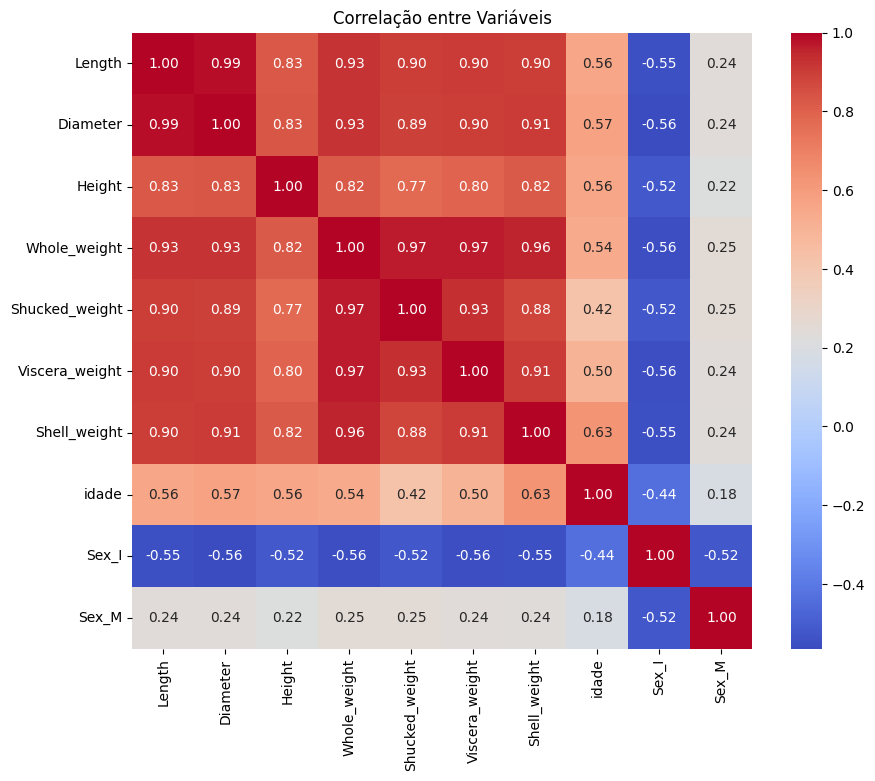

In [ ]:
# Codificação da variável 'Sex'
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Agora o dataframe terá todas as colunas numéricas
# Gráfico de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre Variáveis")
plt.show()



In [ ]:
# Definindo as variáveis de entrada e a variável de saída (idade)
X = df.drop('idade', axis=1)  # Variáveis preditoras
y = df['idade']               # Variável alvo (idade)

In [ ]:
# Separando os dados em variáveis de entrada e saída
X = df.drop('idade', axis=1)
y = df['idade']

# Dividindo em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciando e treinando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)



LinearRegression()

In [ ]:
# Fazendo previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Calculando as métricas de desempenho
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R²: {r2}')
print(f'RMSE: {rmse}')


R²: 0.5481628137889265
RMSE: 2.211613087121836


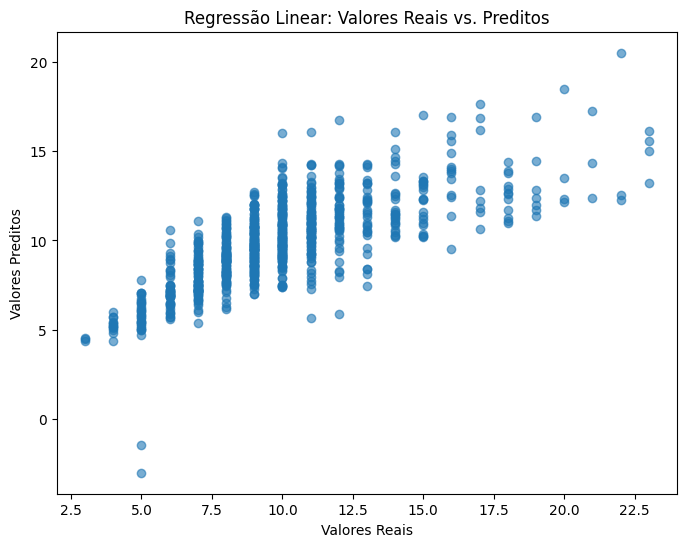

In [ ]:
# Gráfico de dispersão dos valores reais vs. valores preditos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Regressão Linear: Valores Reais vs. Preditos")
plt.show()
